<a href="https://colab.research.google.com/github/eminekilics/world_population/blob/main/world_population_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

loading the dataset

In [ ]:
df = pd.read_csv("world_population.csv")

In [25]:
print(df.columns)

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


first 5 rows

In [ ]:
print(df.head())

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

basic statics

In [ ]:
print(df.describe())

             Rank  2022 Population  2020 Population  2015 Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02    

convert pivot table to long format

In [26]:
year_columns = [col for col in df.columns if "Population" in col]

choose only population columns

In [28]:
df_long = df.melt(id_vars=['Country/Territory'], value_vars=year_columns, var_name='Year', value_name='Population')


set int in the year column

In [31]:
df_long['Year'] = df_long['Year'].str.extract('(\d+)').dropna().astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4166570774.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_long['Year'] = df_long['Year'].str.extract('(\d+)').dropna().astype(int)


Select a specific country and draw a population graph by year. (i will choose Turkey)

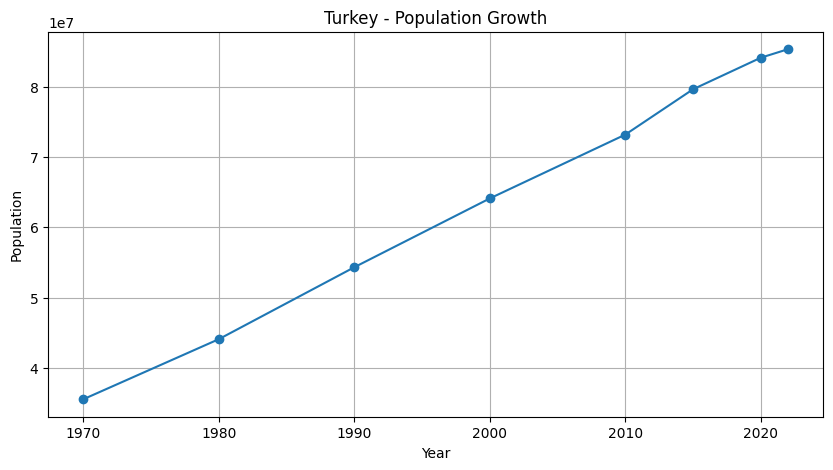

In [32]:
turkey_data = df_long[df_long['Country/Territory'] == 'Turkey']
plt.figure(figsize=(10,5))
plt.plot(turkey_data['Year'], turkey_data['Population'], marker='o')
plt.title("Turkey - Population Growth")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()


the five countries with the highest populations

In [34]:
latest_year = df_long['Year'].max()
top5 = df_long[df_long['Year'] == latest_year].sort_values(by="Population", ascending=False).head(5)
print(f"\n{latest_year} yılında en yüksek nüfuslu 5 ülke:")
print(top5[['Country/Territory','Population']])


2022.0 yılında en yüksek nüfuslu 5 ülke:
    Country/Territory    Population
41              China  1.425887e+09
92              India  1.417173e+09
221     United States  3.382899e+08
93          Indonesia  2.755013e+08
156          Pakistan  2.358249e+08
